In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

In [3]:
# Read in the data

df=pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Let's see how many rows there are in this dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# Let's see if there is any missing values

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
# Let's remove the nulls for rating, gross, company, and runtime

df=df.dropna(subset=['rating','country','gross','company','runtime','writer'])
df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      1991
gross          0
company        0
runtime        0
dtype: int64

In [8]:
# For budget let's take the average budget based on the genre it is in

frames=[]

for i in df['genre'].unique():
    df_genre=df[df['genre']==i]
    if len(df_genre)>1:
        df_genre['budget'].fillna(df_genre['budget'].mean(),inplace=True) 
    else:
        df_genre['budget'].fillna(df['budget'].mean(),inplace=True)
    frames.append(df_genre)

final_df=pd.concat(frames)
    

/Users/felixinoue/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [9]:
final_df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [10]:
final_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,46998772.0,Warner Bros.,146.0
13,Ordinary People,R,Drama,1980,"September 19, 1980 (United States)",7.7,49000.0,Robert Redford,Judith Guest,Donald Sutherland,United States,6.000000e+06,54766923.0,Paramount Pictures,124.0
15,Somewhere in Time,PG,Drama,1980,"October 3, 1980 (United States)",7.2,27000.0,Jeannot Szwarc,Richard Matheson,Christopher Reeve,United States,5.100000e+06,9709597.0,Rastar Pictures,103.0
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,2.324188e+07,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,2.324188e+07,46918287.0,Paramount Pictures,132.0


In [11]:
# Change data types of budget and gross to int

final_df['budget']=final_df['budget'].astype('int')
final_df['gross']=final_df['gross'].astype('int')

In [12]:
# Cleaning up the released column

final_df['released']=final_df['released'].apply(lambda x:x.split('(')[0])

In [13]:
# There are times when the year from the year column doesn't match the year in the released column.
# Let's delete the current year column and replace it with the year from released
final_df.drop('year',axis=1,inplace=True)

In [14]:
final_df['year']=final_df['released'].apply(lambda x:x[-5:])

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7412 entries, 0 to 7613
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7412 non-null   object 
 1   rating    7412 non-null   object 
 2   genre     7412 non-null   object 
 3   released  7412 non-null   object 
 4   score     7412 non-null   float64
 5   votes     7412 non-null   float64
 6   director  7412 non-null   object 
 7   writer    7412 non-null   object 
 8   star      7412 non-null   object 
 9   country   7412 non-null   object 
 10  budget    7412 non-null   int64  
 11  gross     7412 non-null   int64  
 12  company   7412 non-null   object 
 13  runtime   7412 non-null   float64
 14  year      7412 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 926.5+ KB


In [16]:
# Convert year to int

final_df['year']=final_df['year'].astype(int)

In [17]:
# Delete released column

final_df.drop('released',axis=1,inplace=True)

In [19]:
# Looking for any duplicates

dup_movies=final_df['name'].duplicated()==True

dup_movies.sum()

145

In [20]:
# Dropping duplicates
final_df.drop_duplicates(subset='name',keep='first',inplace=True)

In [21]:
final_df[final_df['name'].duplicated()==True]
# There are no more duplicate movies

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,year


Let's try to find out which column in this dataset has the highest correlation to revenue. 

My initial predictions for highest correlation with revenue

- Budget
- Company
- star

In [22]:
final_df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
13,Ordinary People,R,Drama,7.7,49000.0,Robert Redford,Judith Guest,Donald Sutherland,United States,6000000,54766923,Paramount Pictures,124.0,1980
15,Somewhere in Time,PG,Drama,7.2,27000.0,Jeannot Szwarc,Richard Matheson,Christopher Reeve,United States,5100000,9709597,Rastar Pictures,103.0,1980
16,Fame,R,Drama,6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,23241877,21202829,Metro-Goldwyn-Mayer (MGM),134.0,1980
24,Urban Cowboy,PG,Drama,6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,23241877,46918287,Paramount Pictures,132.0,1980


In [23]:
final_df.columns

Index(['name', 'rating', 'genre', 'score', 'votes', 'director', 'writer',
       'star', 'country', 'budget', 'gross', 'company', 'runtime', 'year'],
      dtype='object')

In [24]:
final_df['budget'].sort_values(ascending=False)

7445    356000000
7244    321000000
7075    317000000
7066    300000000
5060    300000000
          ...    
2211        22769
5114        15000
4507         7000
2093         7000
3318         6000
Name: budget, Length: 7267, dtype: int64

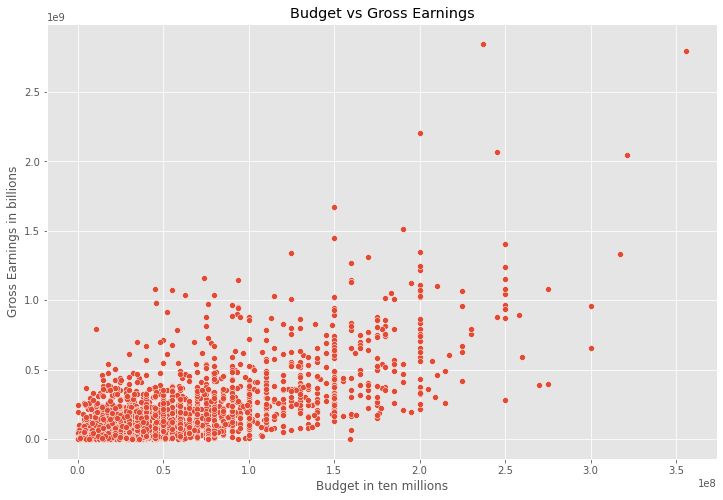

In [25]:
# Scatter plot with budget and revenue
plt.figure(figsize=(12,8))
sns.scatterplot(data=final_df,x='budget',y='gross')
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget in ten millions')
plt.ylabel('Gross Earnings in billions')
plt.show()

From the graph above, we can see that budget is somewhat correlated to gross earnings, but let's explore the strength of this correlation further.

<AxesSubplot:xlabel='budget', ylabel='gross'>

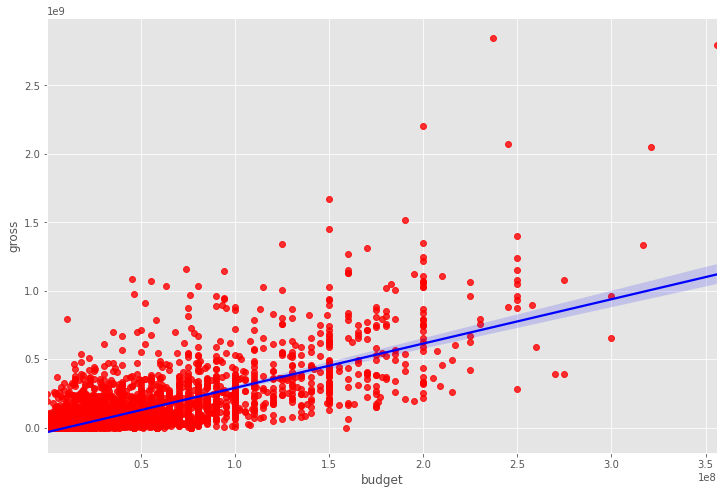

In [26]:
# Regression plot for budget vs gross earnings
plt.figure(figsize=(12,8))
sns.regplot(data=final_df,x='budget',y='gross',scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [27]:
# Let's start looking at correlation

final_df.corr()

,score,votes,budget,gross,runtime,year
score,1.000000,0.414275,0.054442,0.187262,0.396556,0.106003
votes,0.414275,1.000000,0.425942,0.631599,0.308938,0.216571
budget,0.054442,0.425942,1.000000,0.714958,0.260239,0.272611
gross,0.187262,0.631599,0.714958,1.000000,0.248924,0.251648
runtime,0.396556,0.308938,0.260239,0.248924,1.000000,0.114353
year,0.106003,0.216571,0.272611,0.251648,0.114353,1.000000


For numerical columns we can see that budget has the highest correlation with gross earnings followed up by votes. 

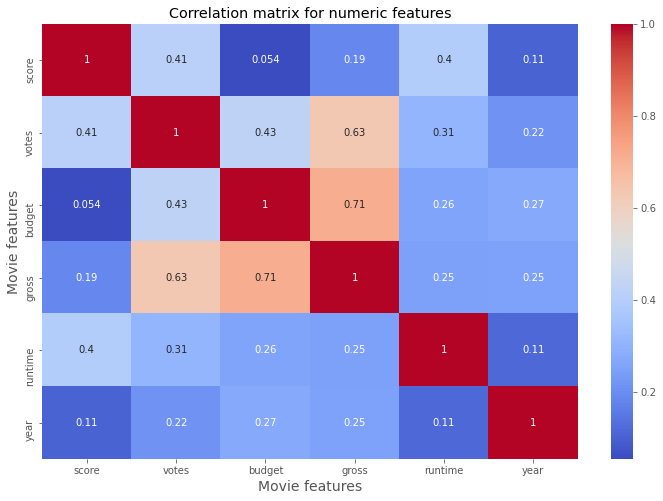

In [28]:
# Create a heatmap for the numerical columns

plt.figure(figsize=(12,8))
correlation_matrix=final_df.corr()

sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

plt.title('Correlation matrix for numeric features')

plt.xlabel('Movie features',fontsize=14)

plt.ylabel('Movie features',fontsize=14)

plt.show()

In [29]:
# To look at the correlation for non-numeric columns, we are going to numerize these columns

df_numeric=final_df.copy()

In [30]:
for col_name in df_numeric.columns:
    if(df_numeric[col_name].dtype=='object'):
        df_numeric[col_name]=df_numeric[col_name].astype('category')
        df_numeric[col_name]=df_numeric[col_name].cat.codes
        
df_numeric

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,6372,6,6,8.4,927000.0,2442,3813,965,52,19000000,46998772,2160,146.0,1980
13,3925,6,6,7.7,49000.0,2256,2211,624,53,6000000,54766923,1682,124.0,1980
15,4840,4,6,7.2,27000.0,1180,3378,430,53,5100000,9709597,1801,103.0,1980
16,1831,6,6,6.6,21000.0,48,692,652,53,23241877,21202829,1526,134.0,1980
24,6896,4,6,6.4,14000.0,1094,12,1223,53,23241877,46918287,1682,132.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5874,5079,5,12,7.0,343000.0,1066,1651,687,53,50000000,260095986,1682,112.0,2011
6198,2895,3,12,8.1,59000.0,2528,3900,2525,20,31876470,459234,429,122.0,2012
6560,5997,6,12,6.3,53000.0,780,351,1325,4,14000000,11020402,1643,108.0,2015
7600,673,5,15,5.9,691.0,71,111,1748,53,36009170,1067629,842,94.0,2019


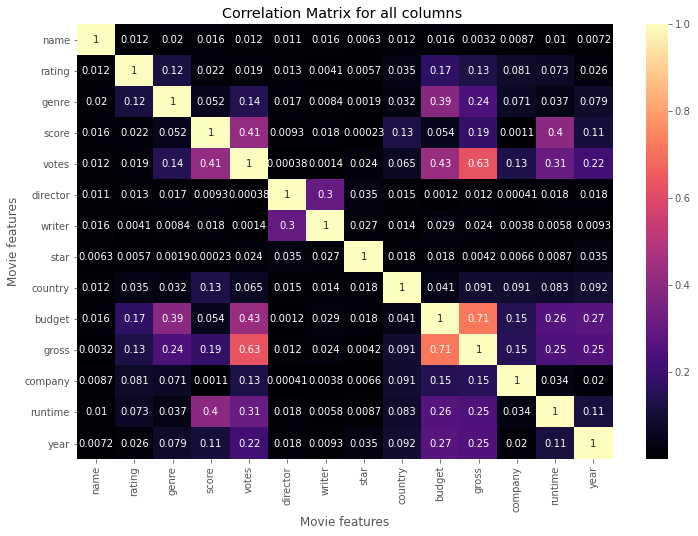

In [31]:
# Let's make another heatmap to look at correlations between all the columns

correlation_matrix_2=df_numeric.corr().abs()

plt.figure(figsize=(12,8))

sns.heatmap(correlation_matrix_2,annot=True,cmap='magma')

plt.title('Correlation Matrix for all columns ')

plt.xlabel('Movie features')

plt.ylabel('Movie features')

plt.show()

In [32]:
# Ranking correlation for each feature

corr_mat=df_numeric.corr().abs()

corr_pairs=corr_mat.unstack()

pd.set_option('display.max_rows', None)

corr_pairs

name      name        1.000000
          rating      0.012457
          genre       0.019661
          score       0.016098
          votes       0.011936
          director    0.011311
          writer      0.015669
          star        0.006302
          country     0.012319
          budget      0.016088
          gross       0.003218
          company     0.008702
          runtime     0.010013
          year        0.007179
rating    name        0.012457
          rating      1.000000
          genre       0.117664
          score       0.021550
          votes       0.019143
          director    0.012610
          writer      0.004054
          star        0.005676
          country     0.035490
          budget      0.173470
          gross       0.127026
          company     0.081046
          runtime     0.072536
          year        0.026495
genre     name        0.019661
          rating      0.117664
          genre       1.000000
          score       0.052081
        

In [33]:
# Ranking correlation for each feature

sorted_pairs=corr_pairs.sort_values()

sorted_pairs

score     star        0.000225
star      score       0.000225
votes     director    0.000380
director  votes       0.000380
company   director    0.000410
director  company     0.000410
company   score       0.001064
score     company     0.001064
director  budget      0.001250
budget    director    0.001250
votes     writer      0.001353
writer    votes       0.001353
genre     star        0.001902
star      genre       0.001902
gross     name        0.003218
name      gross       0.003218
writer    company     0.003832
company   writer      0.003832
rating    writer      0.004054
writer    rating      0.004054
star      gross       0.004189
gross     star        0.004189
rating    star        0.005676
star      rating      0.005676
runtime   writer      0.005839
writer    runtime     0.005839
star      name        0.006302
name      star        0.006302
star      company     0.006596
company   star        0.006596
year      name        0.007179
name      year        0.007179
writer  

In [34]:
# Looking at all column pairs which have correlation above 0.4
sorted_pairs[sorted_pairs>0.4]

votes     score       0.414275
score     votes       0.414275
budget    votes       0.425942
votes     budget      0.425942
gross     votes       0.631599
votes     gross       0.631599
gross     budget      0.714958
budget    gross       0.714958
name      name        1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
year      year        1.000000
dtype: float64

 ### Results
 
 - Budget and number of votes had the highest correlation with gross earnings
 - Company had little correlation with gross earnings 
 - Star had no correlation with gross earnings

In [41]:
# Actors who had the highest gross earnings 

actors_grouped=final_df.groupby('star')['gross'].mean().reset_index().sort_values(by=['gross'],ascending=False)

In [42]:
actors_grouped.head()

,star,gross
1048,Jason Momoa,1.148486e+09
486,Daisy Ridley,1.120174e+09
470,Craig T. Nelson,9.381233e+08
405,Chris Pratt,8.797427e+08
1546,Louis C.K.,8.754586e+08


Text(0, 0.5, 'Gross earnings in billions')

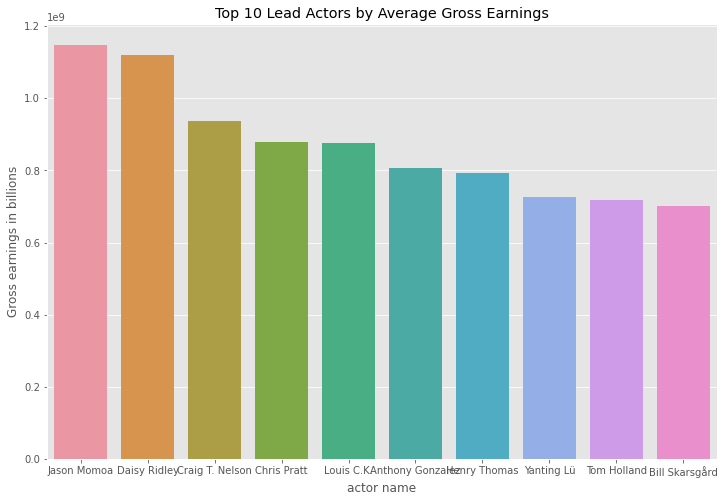

In [44]:
# Top 10 actors by average gross earnings
plt.figure(figsize=(12,8))
sns.barplot(data=actors_grouped[:10],x='star',y='gross')
plt.title('Top 10 Lead Actors by Average Gross Earnings')
plt.xlabel('actor name')
plt.ylabel('Gross earnings in billions')


In [45]:
# Top 10 actors by total gross earnings

actors_total_rev=final_df.groupby('star')['gross'].sum().reset_index().sort_values(by=['gross'],ascending=False)

In [50]:
actors_total_rev.head()

,star,gross
2080,Robert Downey Jr.,10340710719
2455,Tom Hanks,9952423823
2450,Tom Cruise,9031078268
512,Daniel Radcliffe,7954064886
2568,Will Smith,7947279234


Text(0, 0.5, 'Gross earnings in ten billions')

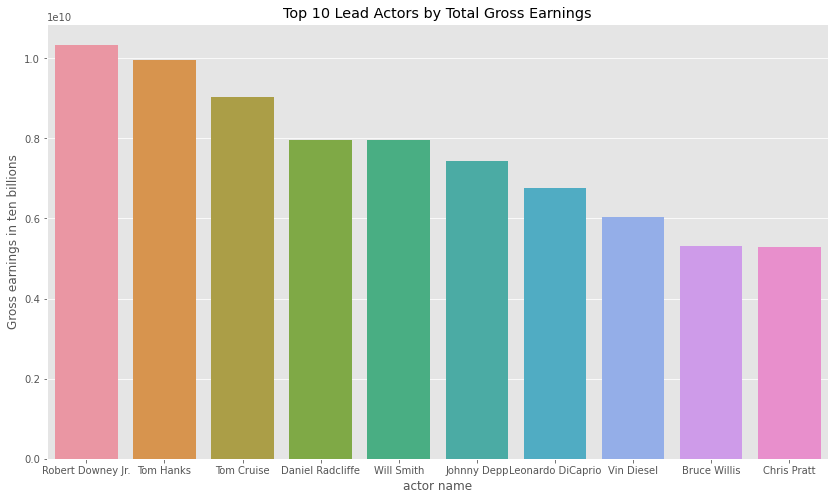

In [52]:
plt.figure(figsize=(14,8))
sns.barplot(data=actors_total_rev[:10],x='star',y='gross')
plt.title('Top 10 Lead Actors by Total Gross Earnings')
plt.xlabel('actor name')
plt.ylabel('Gross earnings in ten billions')

The lead actors with total gross earnings are actors that we are more familiar with overall because they are in many of the most successful movies. However, some of the actors that have the highest average gross earnings are actors that starred in one or a few successful movies such as Jason Momoa in Aquaman. 

Text(0, 0.5, 'Gross Earnings in billions')

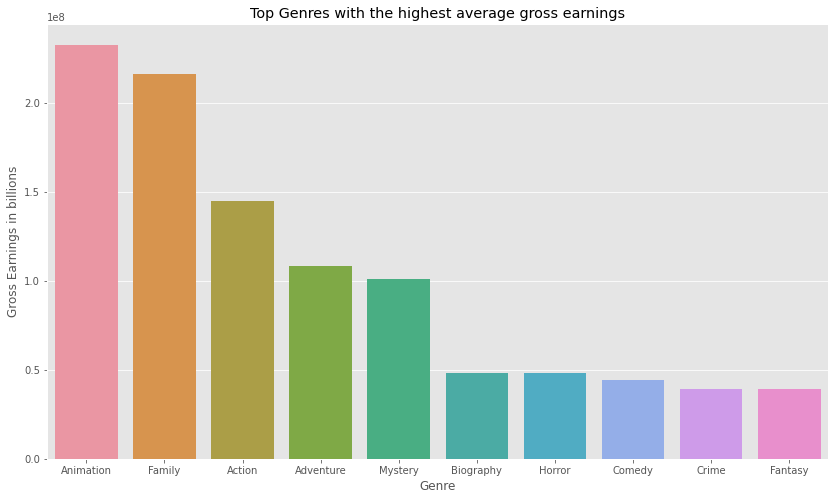

In [59]:
# Genre which had the highest average and total earnings

genre_grouped=final_df.groupby('genre')['gross'].mean().reset_index().sort_values(by=['gross'],ascending=False)

plt.figure(figsize=(14,8))
sns.barplot(data=genre_grouped[:10],x='genre',y='gross')
plt.title('Top Genres with the highest average gross earnings')
plt.xlabel('Genre')
plt.ylabel('Gross Earnings in billions')

Text(0, 0.5, 'Gross Earnings in billions')

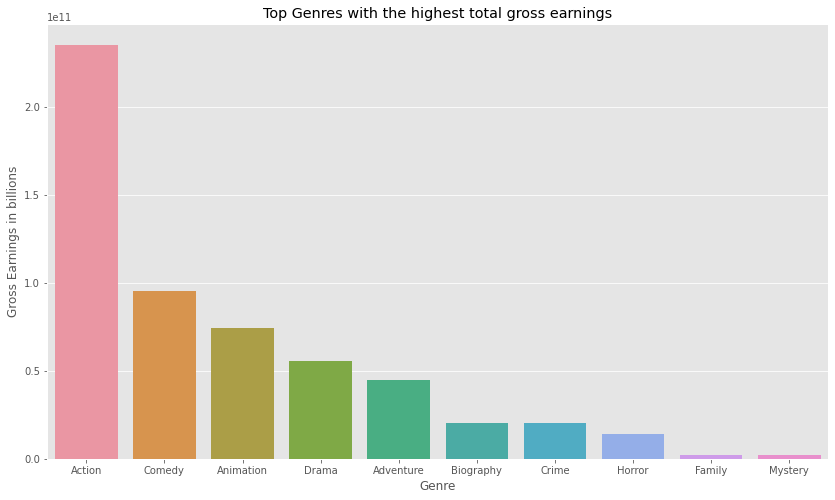

In [60]:
# Genre which had the highest average and total earnings

genre_total_rev=final_df.groupby('genre')['gross'].sum().reset_index().sort_values(by=['gross'],ascending=False)

plt.figure(figsize=(14,8))
sns.barplot(data=genre_total_rev[:10],x='genre',y='gross')
plt.title('Top Genres with the highest total gross earnings')
plt.xlabel('Genre')
plt.ylabel('Gross Earnings in billions')

It looks like Animation, Family, and Action is the most successful genre per movie while Action leads heavily by total revenue due to it being the most popular category for movies being made. 

<AxesSubplot:title={'center':'Average gross revenue over time'}, xlabel='Year', ylabel='Gross Earnings in billions'>

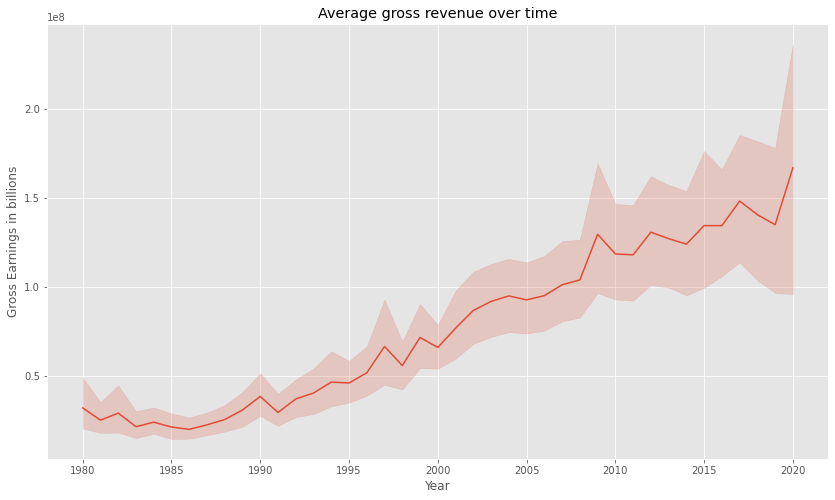

In [64]:
# Let's take a look at average gross revenue over years to see how much money these movies are making over time. 
plt.figure(figsize=(14,8))
plt.title('Average gross revenue over time')
plt.xlabel('Year')
plt.ylabel('Gross Earnings in billions')
sns.lineplot(data=final_df,x='year',y='gross')

From this graph above, we can see that the Average Gross Earnings per movie increases steadily over time.

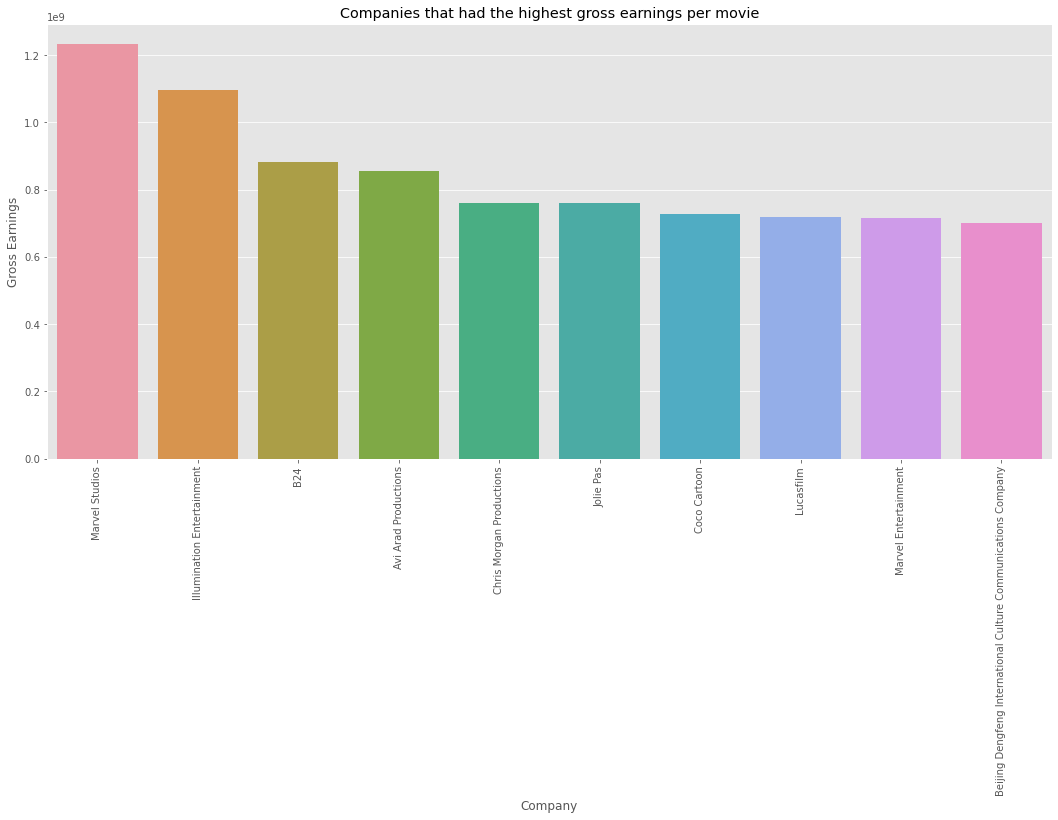

In [72]:
# Company which had the highest average and total earnings

company_grouped=final_df.groupby('company')['gross'].mean().reset_index().sort_values(by=['gross'],ascending=False)

plt.figure(figsize=(18,8))
sns.barplot(data=company_grouped[:10],x='company',y='gross')
plt.title('Companies that had the highest gross earnings per movie')
plt.xlabel('Company')
plt.ylabel('Gross Earnings')
plt.xticks(rotation=90)
plt.show()

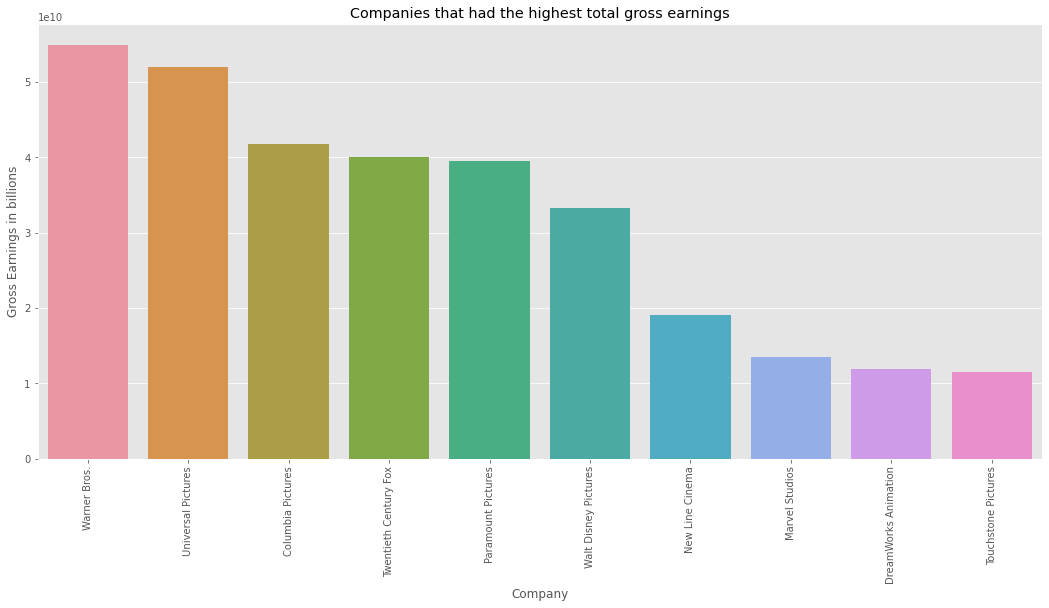

In [73]:
# Company which had the highest average and total earnings

company_total_rev=final_df.groupby('company')['gross'].sum().reset_index().sort_values(by=['gross'],ascending=False)

plt.figure(figsize=(18,8))
sns.barplot(data=company_total_rev[:10],x='company',y='gross')
plt.title('Companies that had the highest total gross earnings')
plt.xlabel('Company')
plt.ylabel('Gross Earnings in billions')
plt.xticks(rotation=90)
plt.show()

It was cool to see that Marvel Studios had the highest earnings per movie which was predictable as pretty much all their movies are top hits. 
Overall, Warner Bros, Universal Pictures, and Columbia Pictures had the highest revenue which makes sense as they are huge and known companies.

In [74]:
final_df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
13,Ordinary People,R,Drama,7.7,49000.0,Robert Redford,Judith Guest,Donald Sutherland,United States,6000000,54766923,Paramount Pictures,124.0,1980
15,Somewhere in Time,PG,Drama,7.2,27000.0,Jeannot Szwarc,Richard Matheson,Christopher Reeve,United States,5100000,9709597,Rastar Pictures,103.0,1980
16,Fame,R,Drama,6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,23241877,21202829,Metro-Goldwyn-Mayer (MGM),134.0,1980
24,Urban Cowboy,PG,Drama,6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,23241877,46918287,Paramount Pictures,132.0,1980


In [86]:
# I want to find out which director/star(lead actor) paired up for the most movies
final_df['director_star'] = final_df['director'] + '_' + final_df['star']
director_star_df = final_df.groupby('director_star')['name'].count().reset_index().sort_values(by=['name'],ascending=False)
director_star_df.columns = ['director_star','Total']
director_star_df.head(10)

,director_star,Total
1072,Clint Eastwood_Clint Eastwood,15
6593,Woody Allen_Woody Allen,14
1485,Dennis Dugan_Adam Sandler,8
6192,Tim Burton_Johnny Depp,7
5081,Richard Donner_Mel Gibson,6
2380,J. Lee Thompson_Charles Bronson,6
3982,Martin Scorsese_Robert De Niro,6
5468,Ron Howard_Tom Hanks,5
5113,Richard Linklater_Ethan Hawke,5
5965,Steven Soderbergh_George Clooney,5


We can see that the top combinations include Dennis Dugan and Adam Sandler, Tim Burton and Johnny Depp, and Martin Scorsese and Robert De Niro. 

In [89]:
# Let's see which the relationship between genre, rating, and gross earnings

pd.pivot_table(data=final_df,index=['genre','rating'],values='gross')

gross
genre     rating                 
Action    G          3.432739e+07
          Not Rated  5.654934e+07
          PG         1.044627e+08
          PG-13      2.693328e+08
          R          6.604604e+07
          TV-14      5.756185e+06
          TV-MA      6.999925e+08
Adventure Approved   3.656528e+07
          G          5.623710e+07
          Not Rated  2.760398e+07
          PG         1.113934e+08
          PG-13      1.913162e+08
          R          4.071231e+07
          TV-MA      3.322479e+06
Animation G          1.790924e+08
          Not Rated  9.662719e+07
          PG         3.017087e+08
          PG-13      7.623918e+07
          R          2.164674e+07
          TV-MA      3.661300e+04
          TV-PG      3.581801e+08
Biography G          6.416569e+06
          NC-17      2.347245e+07
          Not Rated  9.998805e+06
          PG         4.783614e+07
          PG-13      6.577877e+07
          R          4.048896e+07
          TV-MA      7.048080e+05
          Unrated    4.176085e+05
Comedy    G          1.001722e+08
          NC-17      1.702544e+06
          Not Rated  7.919700e+06
          PG         4.493749e+07
          PG-13      6.045521e+07
          R          3.365081e+07
          TV-MA      2.583000e+03
          Unrated    1.535445e+06
Crime     NC-17      1.500800e+07
          Not Rated  6.456739e+06
          PG         9.749639e+06
          PG-13      8.834281e+07
          R          3.802559e+07
          Unrated    1.653047e+06
          X          7.724701e+06
Drama     G          1.635879e+07
          NC-17      1.209224e+07
          Not Rated  5.076320e+06
          PG         3.597845e+07
          PG-13      6.848450e+07
          R          3.159473e+07
          TV-MA      2.653835e+06
          TV-PG      1.284572e+06
          Unrated    1.888530e+06
          X          5.469040e+05
Family    G          5.526314e+06
          PG         3.058996e+08
Fantasy   Not Rated  1.957475e+05
          PG         1.367703e+07
          PG-13      7.117262e+07
          R          3.360003e+07
Horror    NC-17      2.956630e+06
          Not Rated  1.759841e+06
          PG         2.221465e+07
          PG-13      7.639490e+07
          R          4.599678e+07
          X          1.718635e+07
Music     R          1.100140e+05
Musical   Not Rated  2.217255e+06
Mystery   Not Rated  4.592340e+05
          PG-13      2.586938e+08
          R          6.589575e+07
Romance   Not Rated  6.465320e+05
          PG         1.140285e+07
          PG-13      1.278694e+08
          R          9.935781e+06
Sci-Fi    Not Rated  2.244000e+04
          PG         1.021946e+07
          PG-13      6.864000e+07
          R          4.760570e+06
Sport     PG-13      1.067629e+06
Thriller  PG         9.032747e+05
          PG-13      6.642878e+07
          R          2.222209e+07
Western   PG         1.736123e+06
          R          1.514488e+07

This graph above shows that for most genres, the movies rated as PG-13 tend to do the best as they have the biggest audience including both kids as well as adults. 